## pNN HEPMASS

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from script import utils, cms, hep
from script.utils import free_mem

from script.hep.data import BalancedSequence, UniformSequence
from script.models.layers import Divide
from script.datasets import Hepmass

sns.set()

In [2]:
# for debugging, comment if not needed
%load_ext autoreload
%autoreload 2

In [3]:
utils.set_random_seed(42)

Random seed 42 set.


In [4]:
# load training data
data = Hepmass()
data.load(path=Hepmass.TRAIN_PATH)

loading...
dataset loaded.


In [5]:
# preprocessing layers
preproc = {'m': [Divide(1000.0)]}

### Training

In [7]:
model, checkpoint = utils.get_compiled_pnn(data, save='hepmass/pnn', preprocess=preproc)

In [20]:
train, valid = data.to_dataset(batch_size=1024)

In [21]:
model.fit(x=train, epochs=25, validation_data=valid, verbose=2, callbacks=[checkpoint])

Epoch 1/25
5127/5127 - 73s - loss: 0.2482 - binary_accuracy: 0.8722 - auc: 0.9505 - precision: 0.8563 - recall: 0.8947 - ams: 0.8778 - class-loss: 0.2800 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.2199 - weight-norm: 24.4909 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.2683 - val_binary_accuracy: 0.8788 - val_auc: 0.9548 - val_precision: 0.8569 - val_recall: 0.9095 - val_ams: 0.8839
Epoch 2/25
5127/5127 - 70s - loss: 0.2627 - binary_accuracy: 0.8804 - auc: 0.9555 - precision: 0.8639 - recall: 0.9031 - ams: 0.8852 - class-loss: 0.2656 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.1738 - weight-norm: 29.3998 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.2651 - val_binary_accuracy: 0.8809 - val_auc: 0.9560 - val_precision: 0.8606 - val_recall: 0.9090 - val_ams: 0.8856
Epoch 3/25
5127/5127 - 75s - loss: 0.2633 - binary_accuracy: 0.8822 - auc: 0.9566 - precision: 0.8659 - recall: 0.9045 - ams: 0.8867 - class-loss: 0.2623 - fool

In [8]:
utils.load_from_checkpoint(model, path='hepmass/pnn')

Loaded from "weights\hepmass/pnn\weights-18-0.958"


In [ ]:
l2_kernel = tf.keras.regularizers.l2(1e-5)
l2_bias = tf.keras.regularizers.l2(1e-6)

model_l2, checkpoint = utils.get_compiled_pnn(data, save='hepmass/pnn-drop-l2',
                                              kernel_regularizer=l2_kernel,
                                              bias_regularizer=l2_bias,
                                              preprocess=preproc, dropout=0.25)

In [ ]:
model_l2.fit(x=train, epochs=25, validation_data=valid, verbose=2, callbacks=[checkpoint])

In [ ]:
utils.load_from_checkpoint(model_l2, path='hepmass/pnn-drop-l2')

### Balanced Training + mA Sampling

In [6]:
train, valid = BalancedSequence.get_data(data, train_batch=1024)

In [7]:
balanced, checkpoint = utils.get_compiled_pnn(data, save='hepmass/pnn-balanced', 
                                              preprocess=preproc, dropout=0.25)

In [8]:
balanced.fit(x=train, epochs=25, validation_data=valid, verbose=2, callbacks=[checkpoint])

Epoch 1/25
5147/5147 - 141s - loss: 0.2729 - binary_accuracy: 0.8643 - auc: 0.9445 - precision: 0.8490 - recall: 0.8862 - ams: 0.8705 - class-loss: 0.2971 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.1921 - weight-norm: 24.5003 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.1331 - val_binary_accuracy: 0.9473 - val_auc: 0.9821 - val_precision: 0.7988 - val_recall: 0.8710 - val_ams: 0.8549
Epoch 2/25
5147/5147 - 143s - loss: 0.2658 - binary_accuracy: 0.8744 - auc: 0.9511 - precision: 0.8574 - recall: 0.8982 - ams: 0.8796 - class-loss: 0.2788 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.1864 - weight-norm: 31.8454 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.1288 - val_binary_accuracy: 0.9551 - val_auc: 0.9821 - val_precision: 0.8225 - val_recall: 0.8968 - val_ams: 0.8599
Epoch 3/25
5147/5147 - 141s - loss: 0.2769 - binary_accuracy: 0.8762 - auc: 0.9523 - precision: 0.8594 - recall: 0.8997 - ams: 0.8813 - class-loss: 0.2757 - f

In [9]:
utils.load_from_checkpoint(balanced, path='hepmass/pnn-balanced')

Loaded from "weights\hepmass/pnn-balanced\weights-07-0.985"


In [7]:
l2_kernel = tf.keras.regularizers.l2(3e-5)
l2_bias = tf.keras.regularizers.l2(3e-6)

balanced_l2, checkpoint = utils.get_compiled_pnn(data, save='hepmass/pnn-balanced-l2',
                                                 kernel_regularizer=l2_kernel,
                                                 bias_regularizer=l2_bias,
                                                 preprocess=preproc, dropout=0.25)

In [8]:
balanced_l2.fit(x=train, epochs=25+5, validation_data=valid, verbose=2, callbacks=[checkpoint])

Epoch 1/30
5147/5147 - 155s - loss: 0.3011 - binary_accuracy: 0.8647 - auc: 0.9449 - precision: 0.8493 - recall: 0.8868 - ams: 0.8707 - class-loss: 0.3045 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.1978 - weight-norm: 16.8868 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0084 - val_loss: 0.1010 - val_binary_accuracy: 0.9609 - val_auc: 0.9915 - val_precision: 0.8556 - val_recall: 0.9167 - val_ams: 0.9044
Epoch 2/30
5147/5147 - 153s - loss: 0.2754 - binary_accuracy: 0.8743 - auc: 0.9510 - precision: 0.8575 - recall: 0.8976 - ams: 0.8794 - class-loss: 0.2862 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.2013 - weight-norm: 15.7207 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0069 - val_loss: 0.1094 - val_binary_accuracy: 0.9551 - val_auc: 0.9897 - val_precision: 0.8211 - val_recall: 0.9286 - val_ams: 0.8883
Epoch 3/30
5147/5147 - 137s - loss: 0.3020 - binary_accuracy: 0.8752 - auc: 0.9516 - precision: 0.8579 - recall: 0.8992 - ams: 0.8805 - class-loss: 0.2845 - fool-loss

In [10]:
utils.load_from_checkpoint(balanced_l2, path='hepmass/pnn-balanced-l2')

Loaded from "weights\hepmass/pnn-balanced-l2\weights-01-0.992"


### Uniform mA for Bkg

In [15]:
train, valid = UniformSequence.get_data(data, interval=(100, 2000), train_batch=1024)

In [11]:
uniform, checkpoint = utils.get_compiled_pnn(data, save='hepmass/pnn-uniform', 
                                             preprocess=preproc)

In [17]:
uniform.fit(x=train, epochs=25, validation_data=valid, verbose=2, callbacks=[checkpoint])

Epoch 1/25
5147/5147 - 119s - loss: 0.1025 - binary_accuracy: 0.9396 - auc: 0.9832 - precision: 0.9237 - recall: 0.9585 - ams: 0.9411 - class-loss: 0.1553 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 0.9727 - weight-norm: 25.8550 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.1539 - val_binary_accuracy: 0.9492 - val_auc: 0.9867 - val_precision: 0.7721 - val_recall: 0.9822 - val_ams: 0.9169
Epoch 2/25
5147/5147 - 113s - loss: 0.0798 - binary_accuracy: 0.9720 - auc: 0.9939 - precision: 0.9606 - recall: 0.9843 - ams: 0.9724 - class-loss: 0.0821 - fool-loss: 0.0000e+00 - lr: 0.0010 - grad-norm: 1.5432 - weight-norm: 31.9013 - adversarial-loss: 0.0000e+00 - reg-losses: 0.0000e+00 - val_loss: 0.1314 - val_binary_accuracy: 0.9531 - val_auc: 0.9876 - val_precision: 0.7895 - val_recall: 0.9763 - val_ams: 0.9071
Epoch 3/25
5147/5147 - 115s - loss: 0.0624 - binary_accuracy: 0.9794 - auc: 0.9959 - precision: 0.9701 - recall: 0.9894 - ams: 0.9797 - class-loss: 0.0626 - f

In [12]:
utils.load_from_checkpoint(uniform, path='hepmass/pnn-uniform')

Loaded from "weights\hepmass/pnn-uniform\weights-08-0.992"


### Evaluation + Comparison

In [11]:
# load test-set
test = Hepmass()
test.load(path=Hepmass.TEST_PATH)

loading...
dataset loaded.


In [12]:
model = utils.get_compiled_pnn(test, preprocess=preproc)
utils.load_from_checkpoint(model, path='hepmass/pnn')

balanced = utils.get_compiled_pnn(test, preprocess=preproc, dropout=0.25)
utils.load_from_checkpoint(balanced, path='hepmass/pnn-balanced-l2')

uniform = utils.get_compiled_pnn(test, preprocess=preproc)
utils.load_from_checkpoint(uniform, path='hepmass/pnn-uniform')

Loaded from "weights\hepmass/pnn\weights-18-0.958"
Loaded from "weights\hepmass/pnn-balanced-l2\weights-01-0.992"
Loaded from "weights\hepmass/pnn-uniform\weights-08-0.992"


In [13]:
models = {'pNN': model, 'balanced': balanced, 'uniform': uniform} 

Significance:

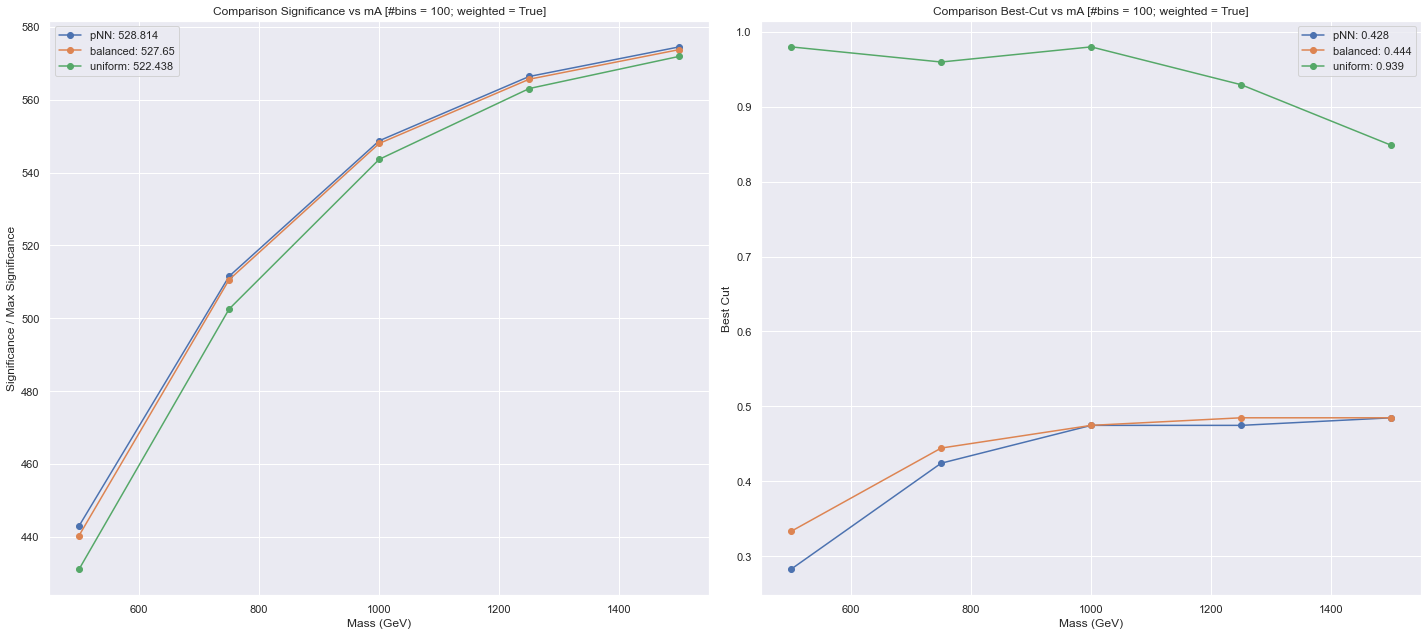

In [15]:
hep.significance_vs_mass(models, dataset=test, bins=100, ratio=False)

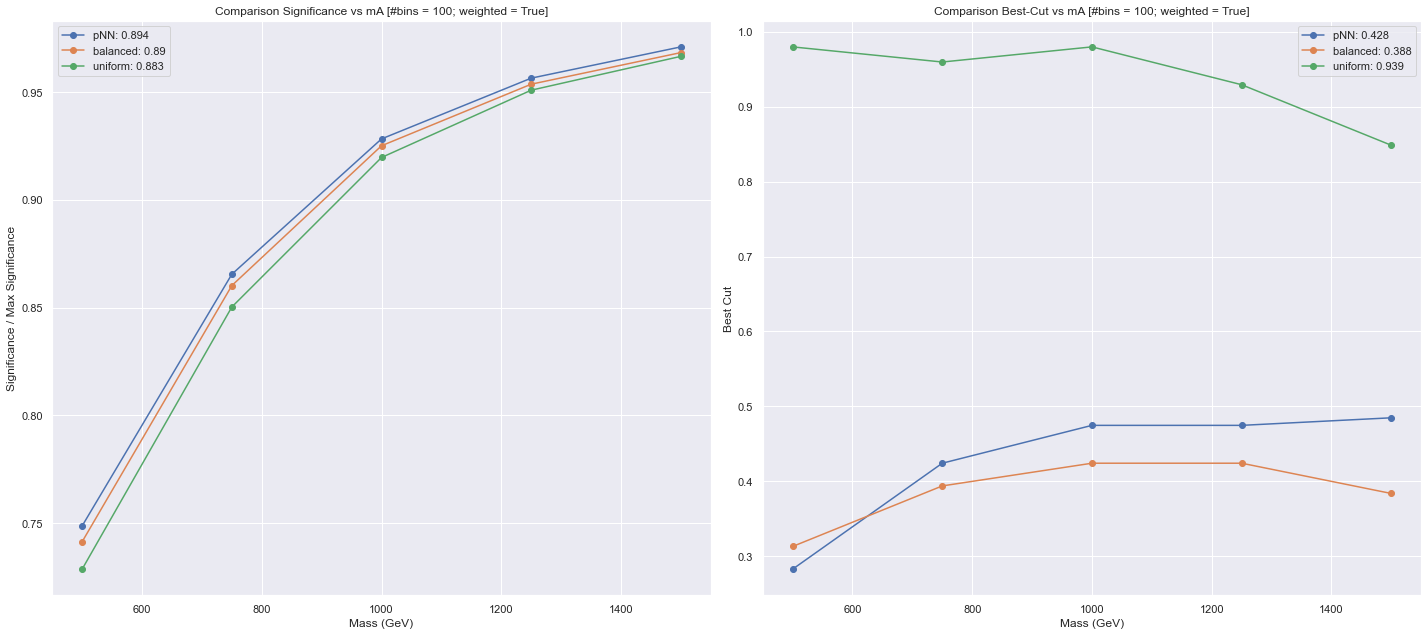

In [7]:
hep.significance_vs_mass(models, dataset=test, bins=100)

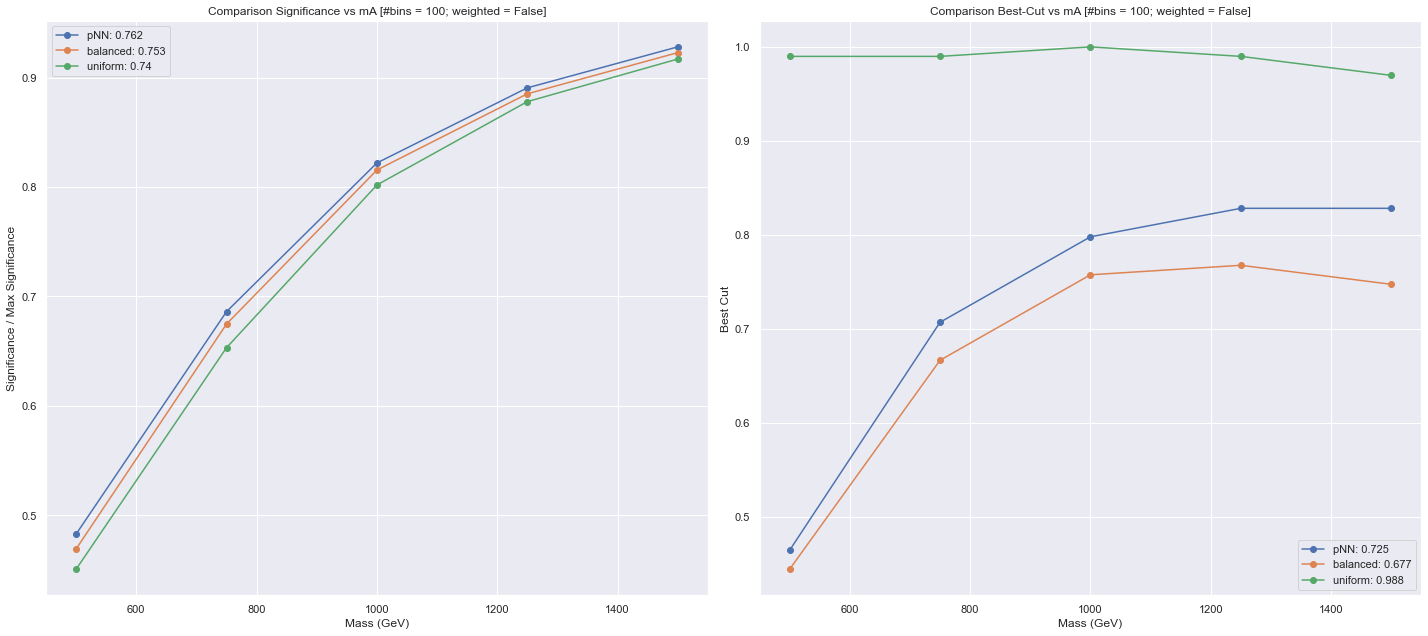

In [33]:
# not weighted
hep.significance_vs_mass(models, dataset=test, bins=100, ratio=True, weight=False)

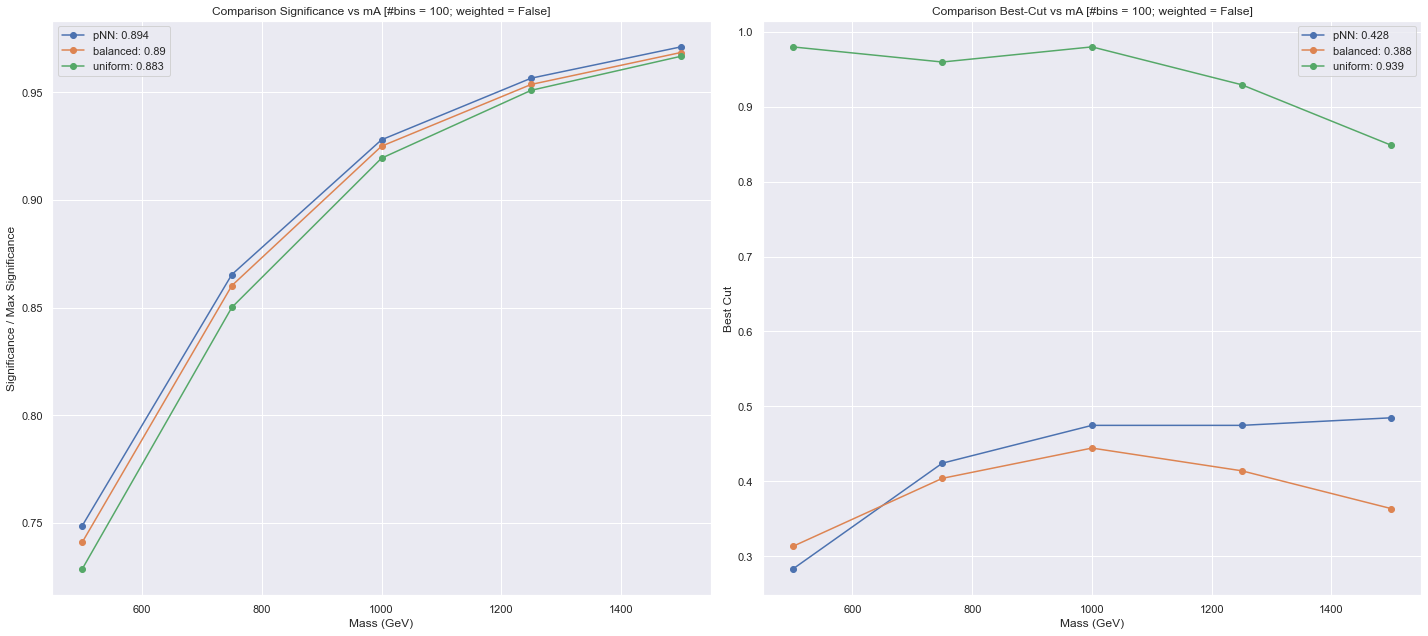

In [37]:
# original
hep.significance_vs_mass(models, dataset=test, bins=100, ratio=True, all_bkg=False)

* Computing metrics on all background (but weighted), is **equivalent** to taking the bkg assigned to a certain mA (remember: in a random way).

In [40]:
free_mem()

22

=== 500 mA ===


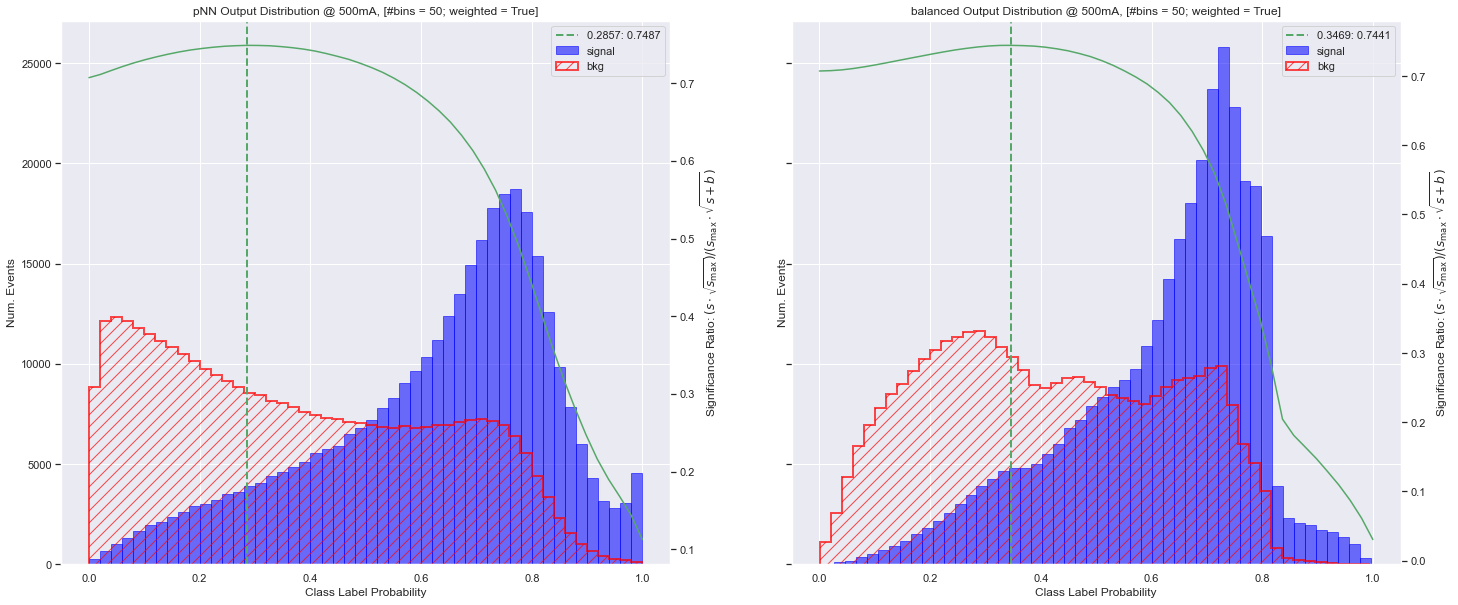

=== 750 mA ===


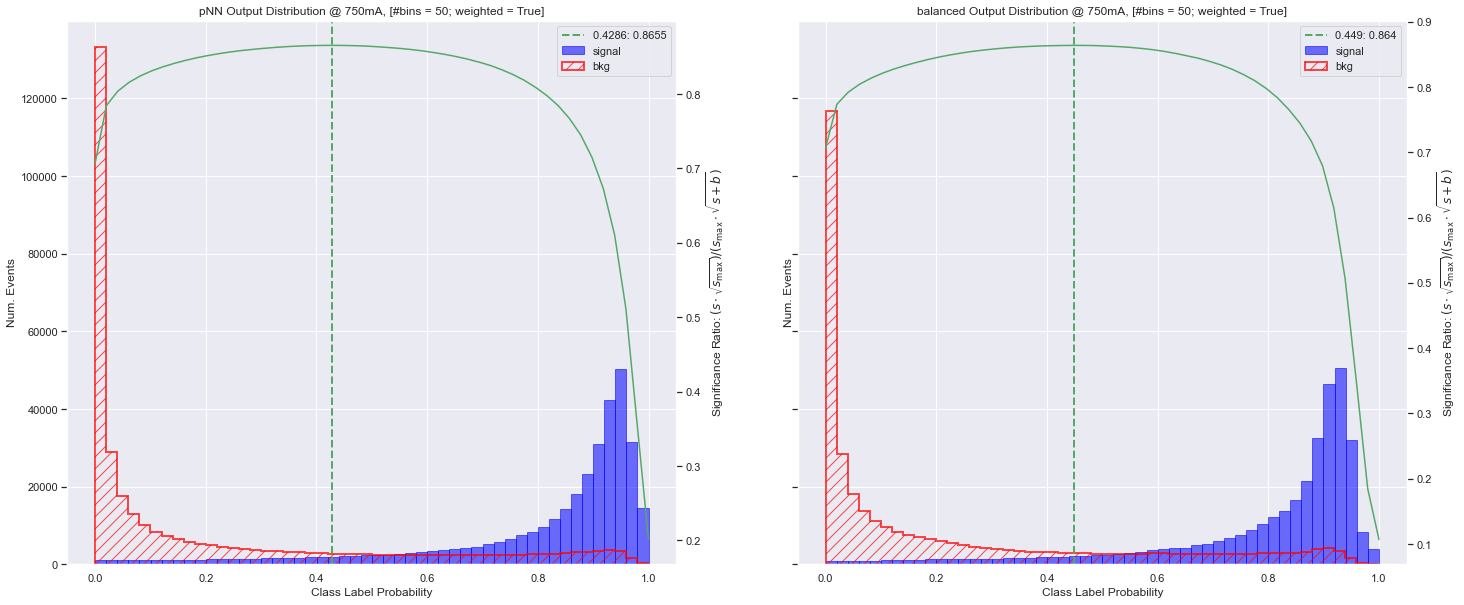

=== 1000 mA ===


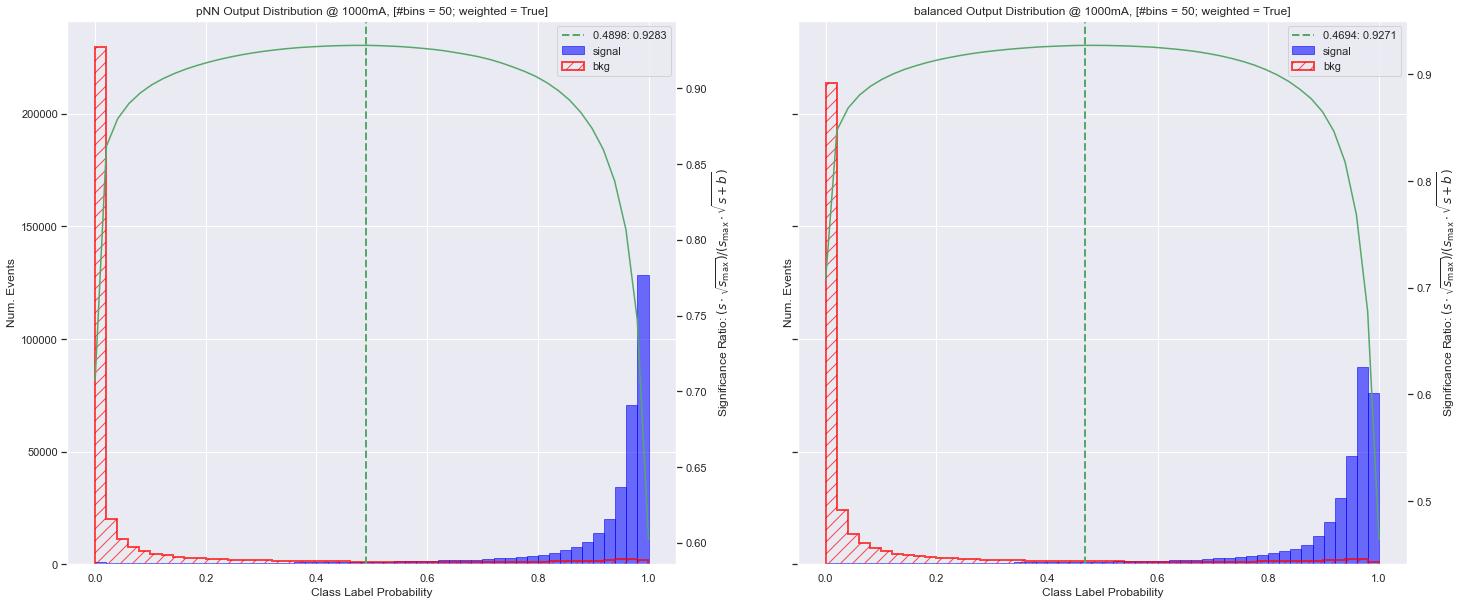

=== 1250 mA ===


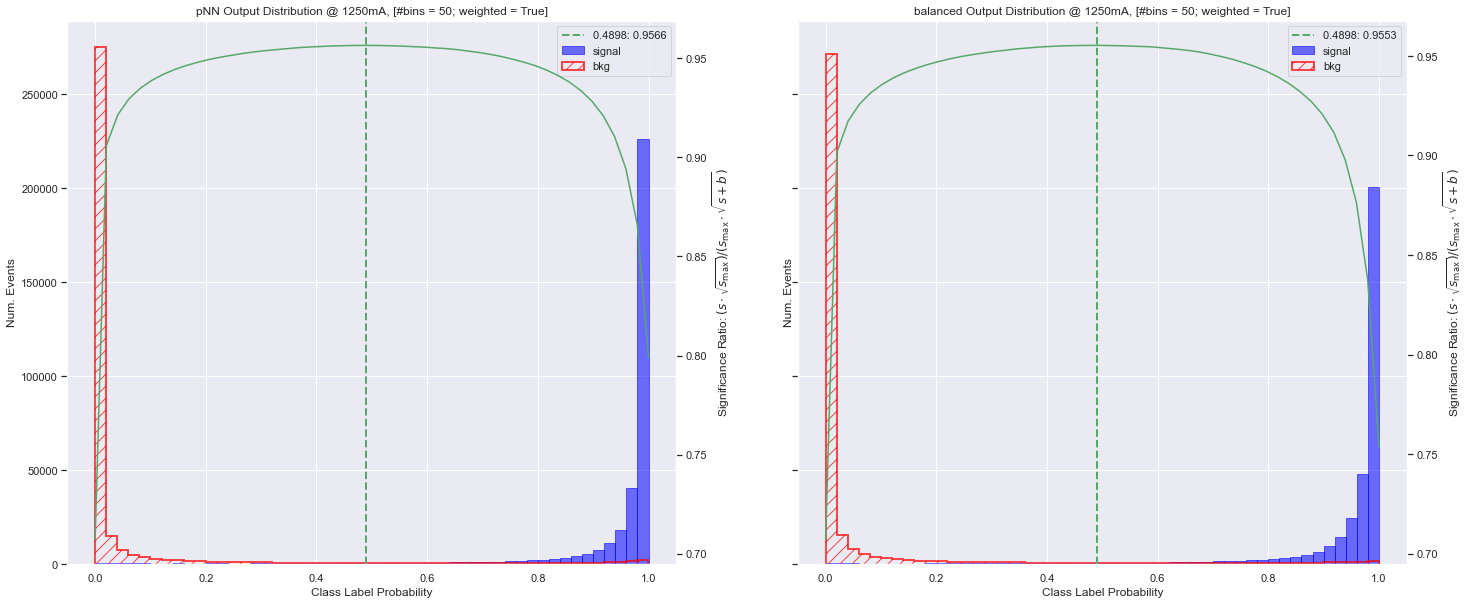

=== 1500 mA ===


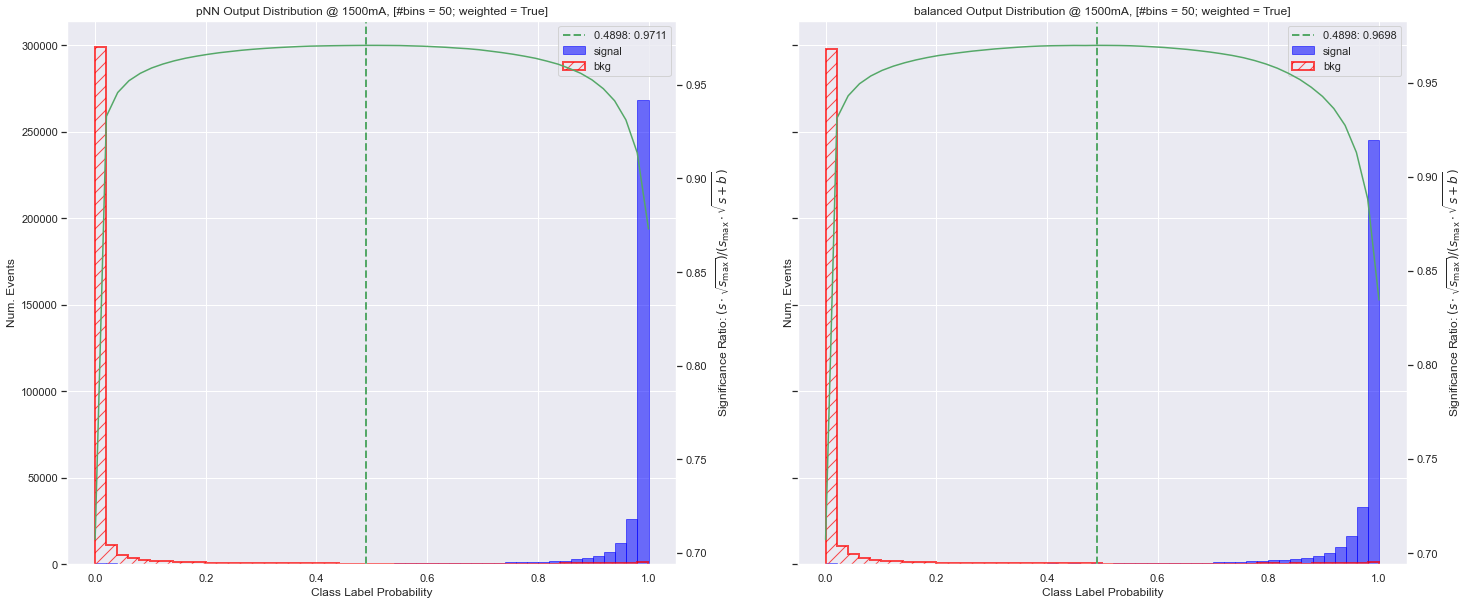

In [20]:
for mass in test.unique_signal_mass:
    print(f'=== {int(mass)} mA ===')
    axes = utils.get_plot_axes(rows=1, cols=2, sharey=True)
    
    for ax, (name, pnn) in zip(axes, models.items()):
        hep.plot.significance(pnn, test, mass=mass, bins=50, ax=ax, name=name, 
                              show=False, ratio=True)
    plt.show()
    free_mem()

=== 500 mA ===


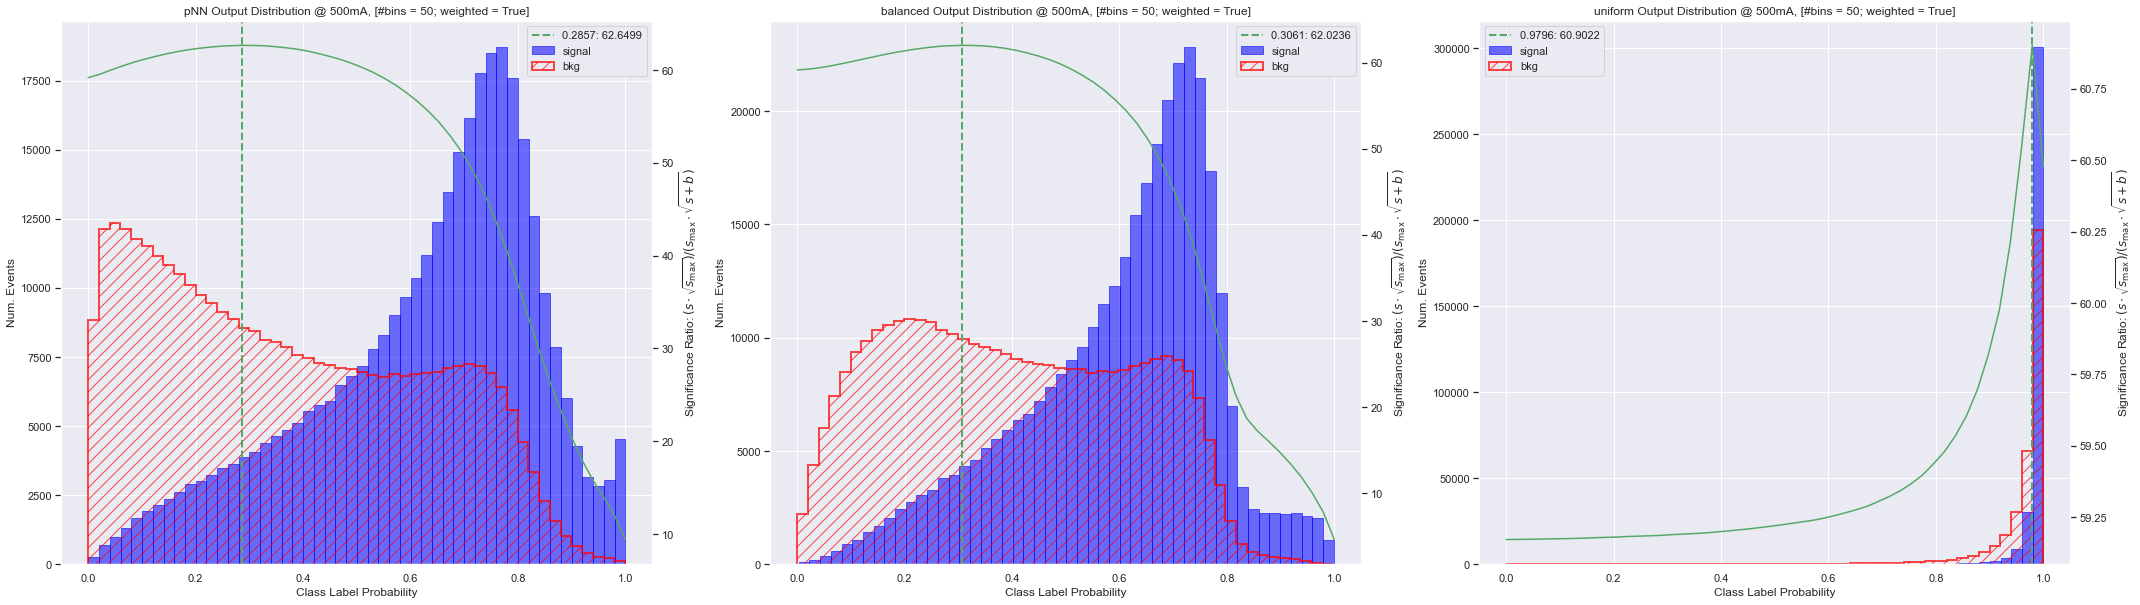

=== 750 mA ===


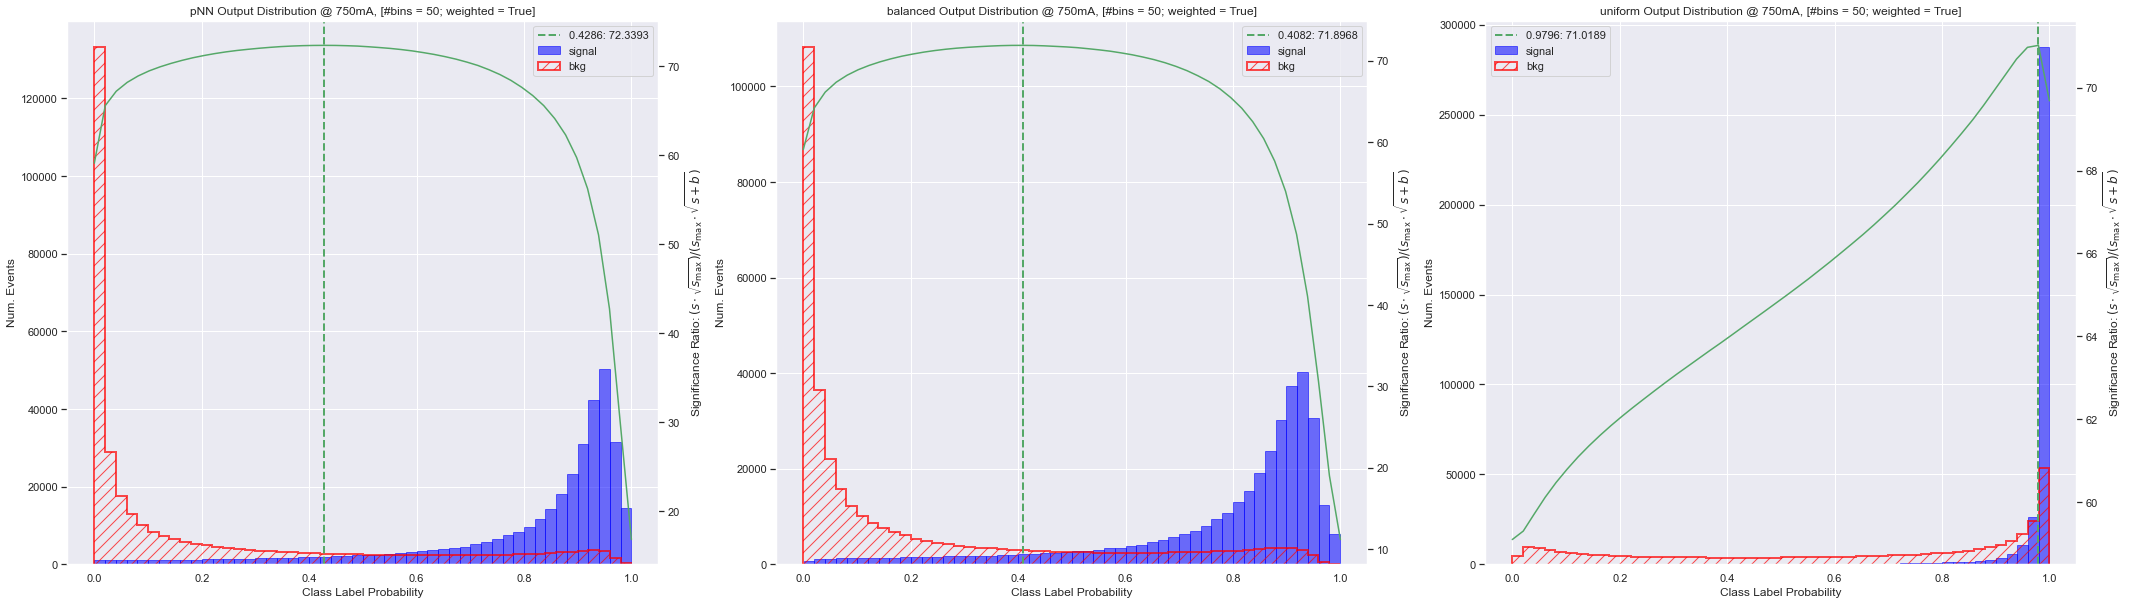

=== 1000 mA ===


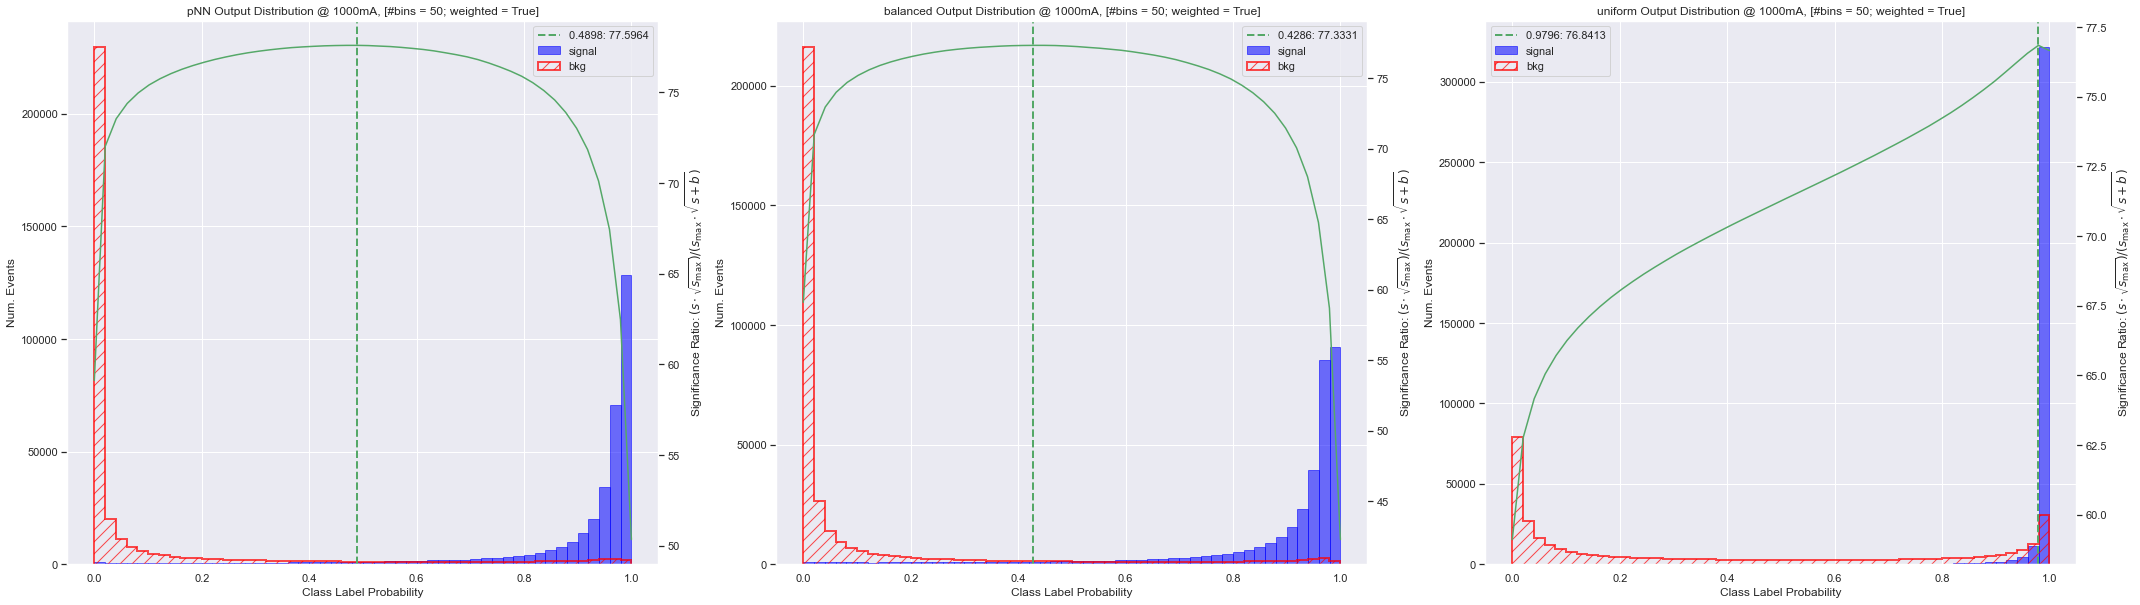

=== 1250 mA ===


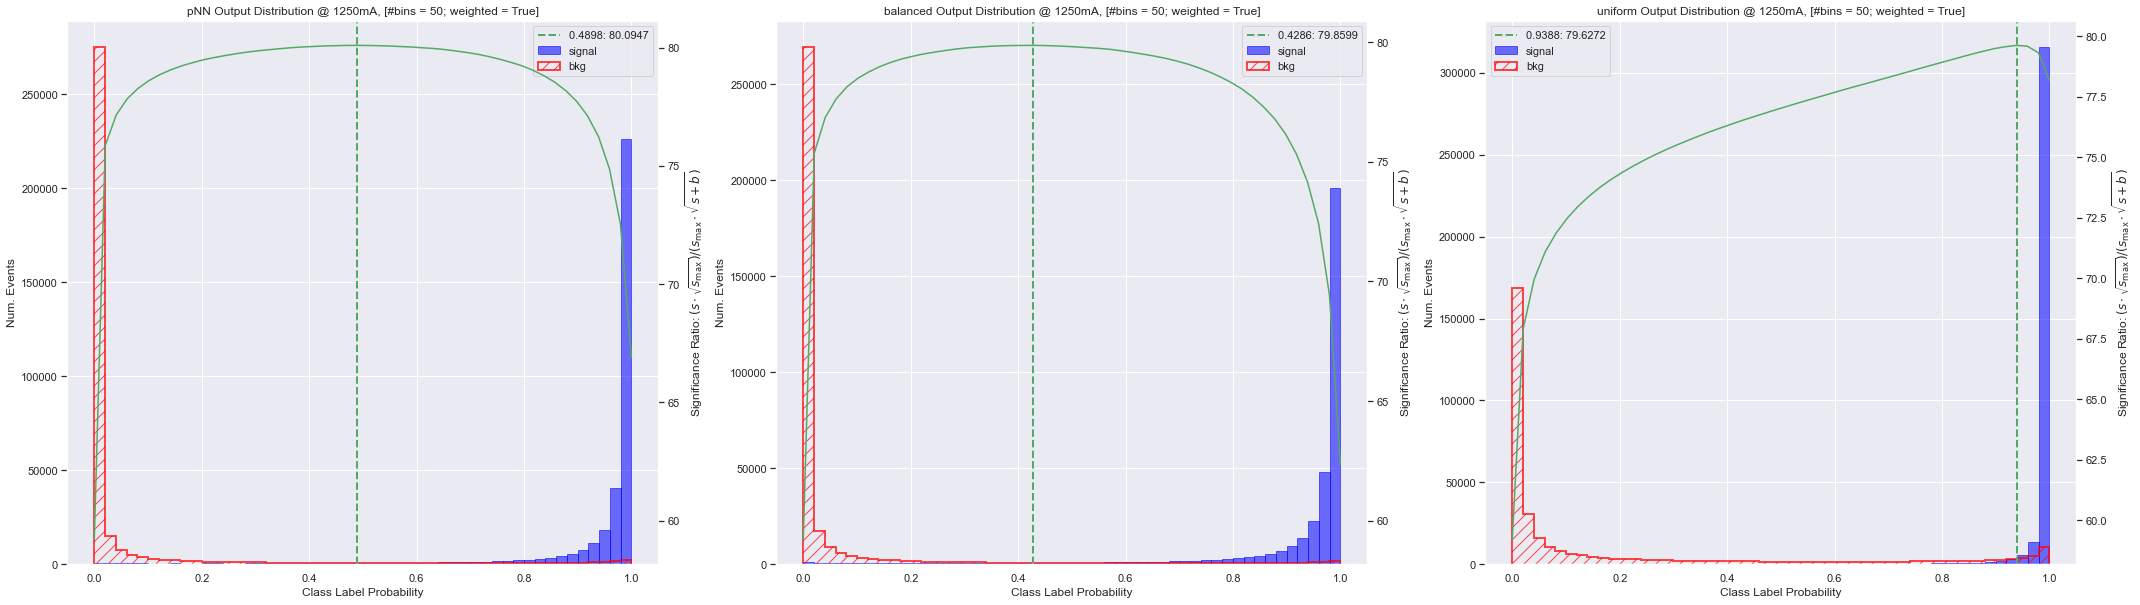

=== 1500 mA ===


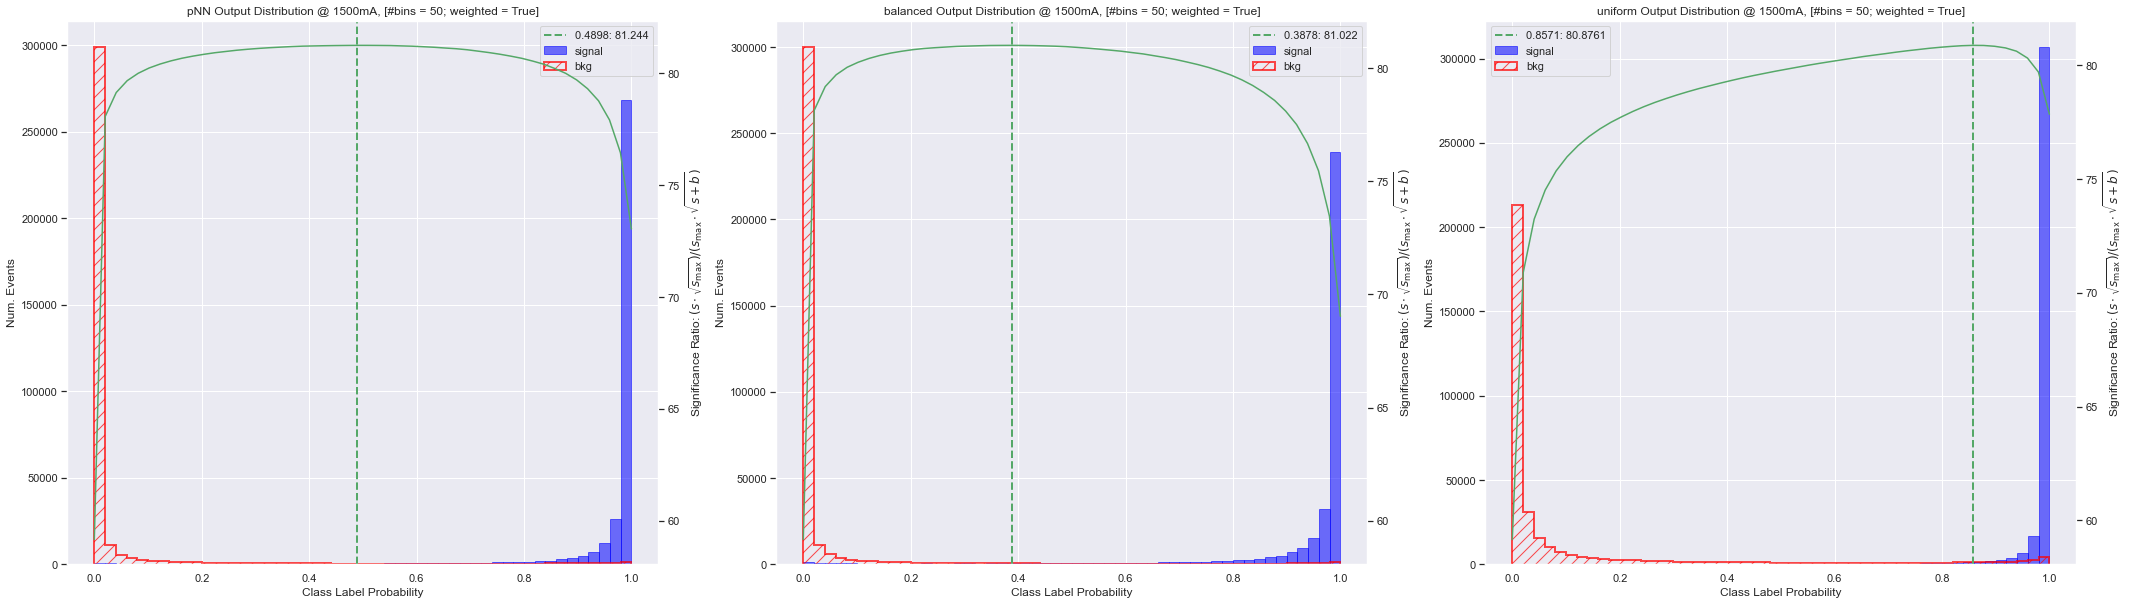

In [30]:
for mass in test.unique_signal_mass:
    print(f'=== {int(mass)} mA ===')
    axes = utils.get_plot_axes(rows=1, cols=3)
    
    for ax, (name, pnn) in zip(axes, models.items()):
        hep.significance(pnn, test, mass=mass, bins=50, ax=ax, name=name, show=False, ratio=True)

    plt.show()
    free_mem()

=== 500 mA ===


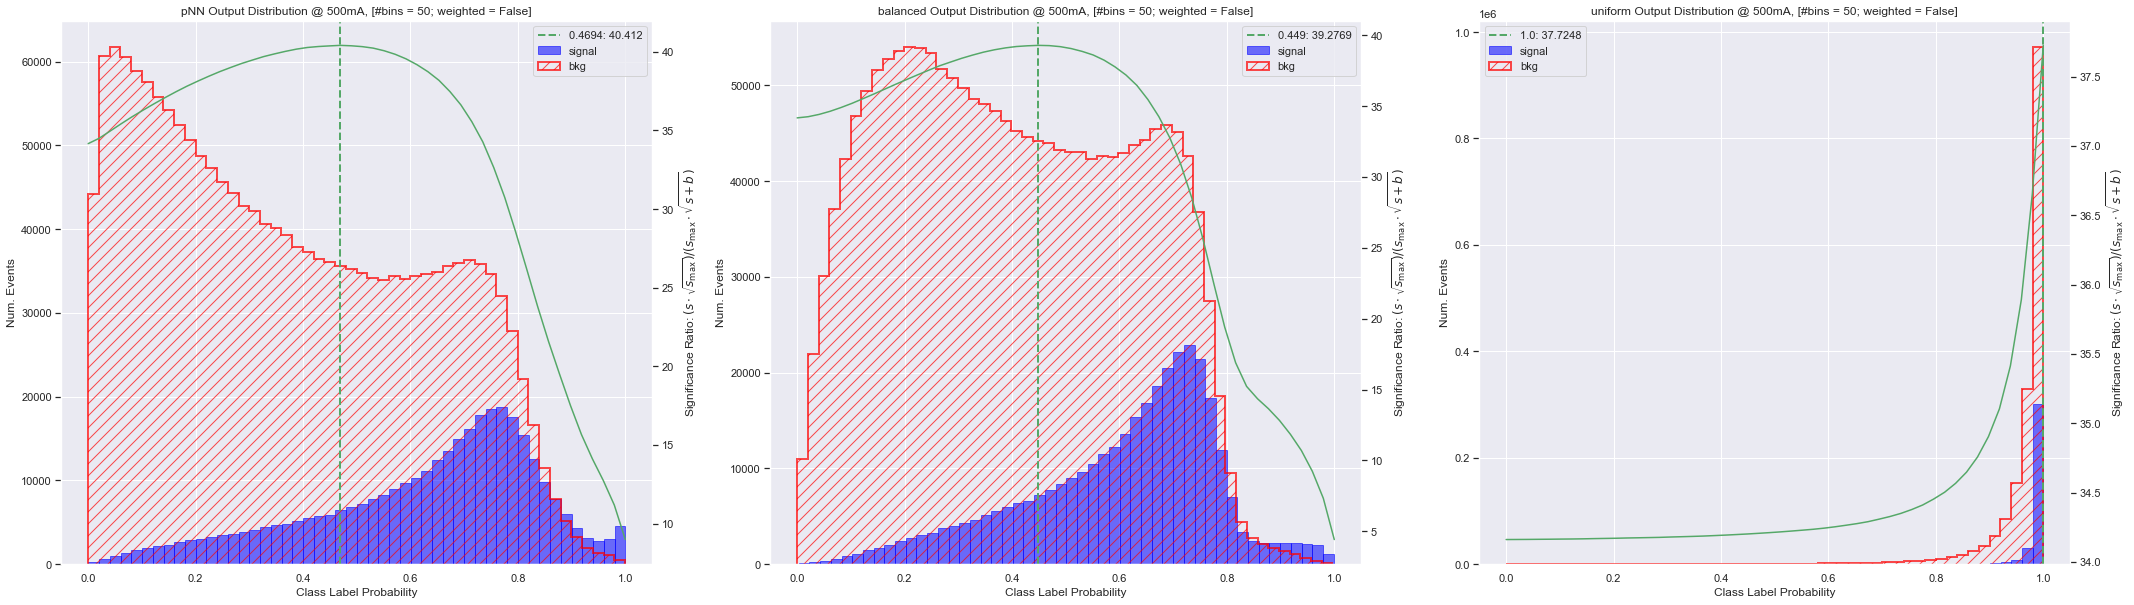

=== 750 mA ===


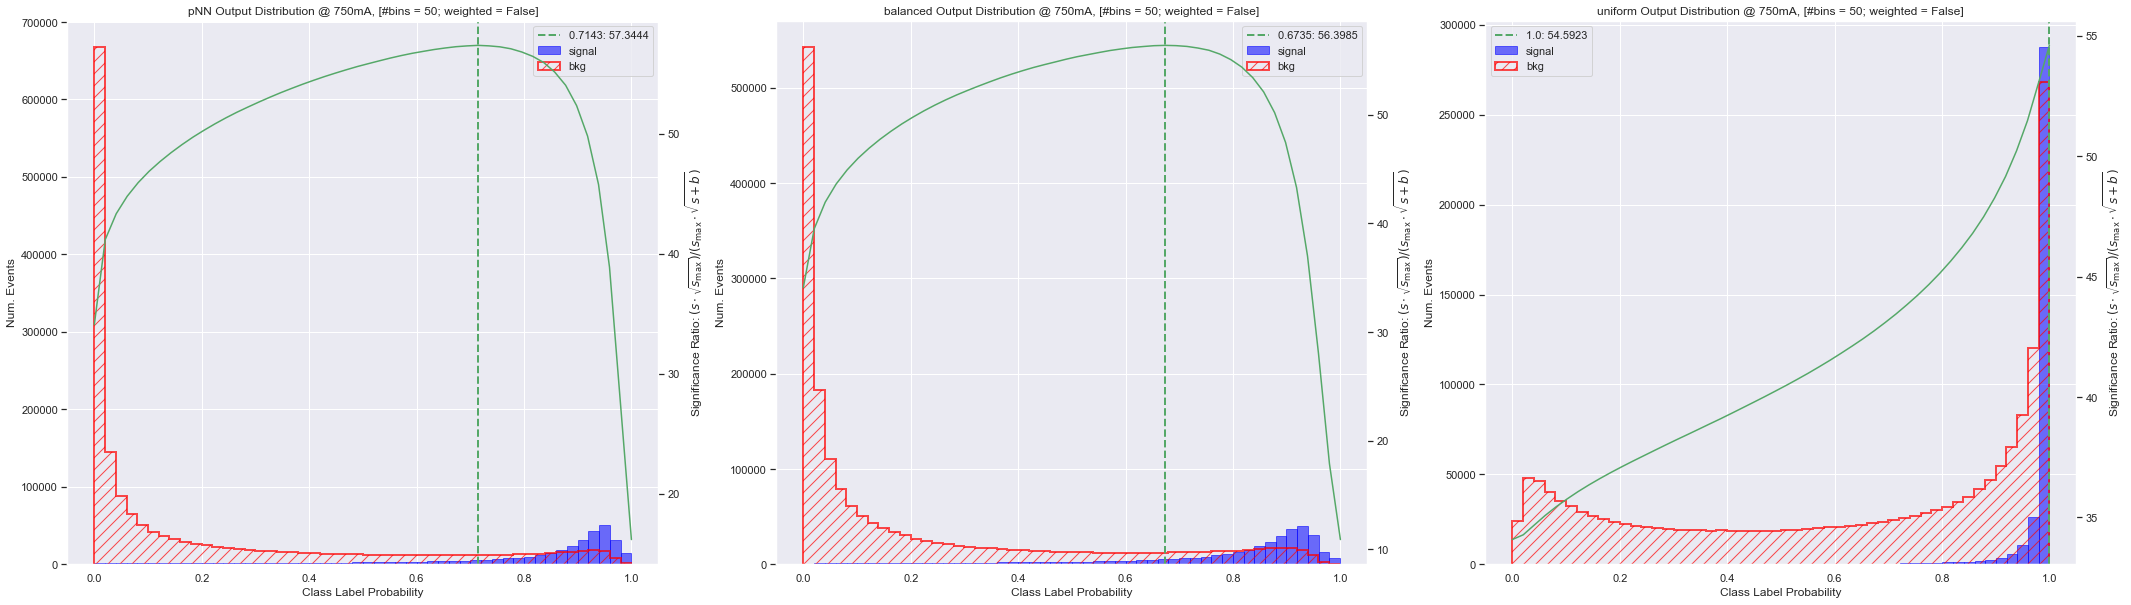

=== 1000 mA ===


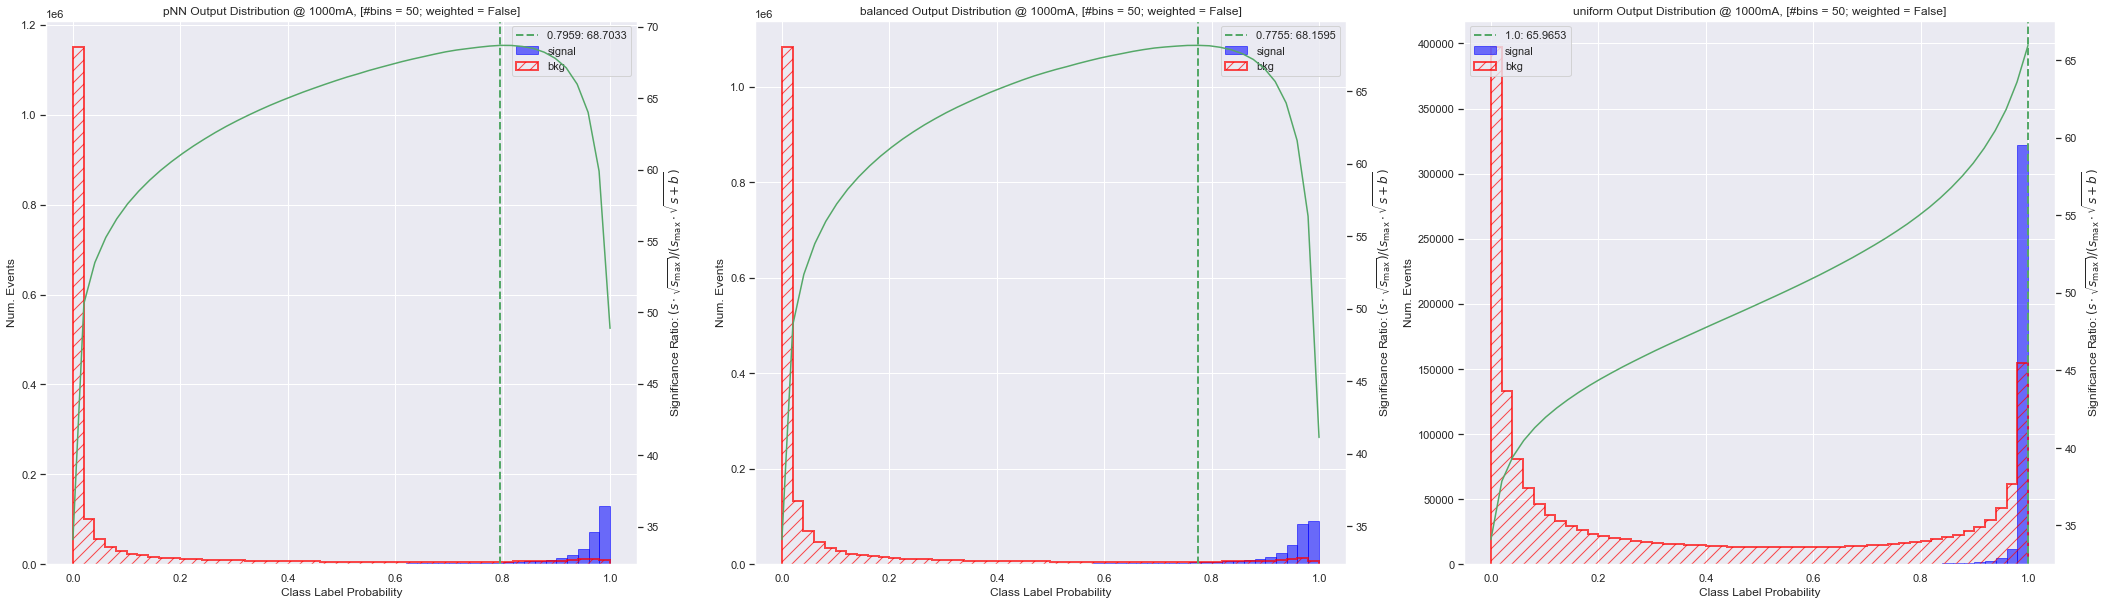

=== 1250 mA ===


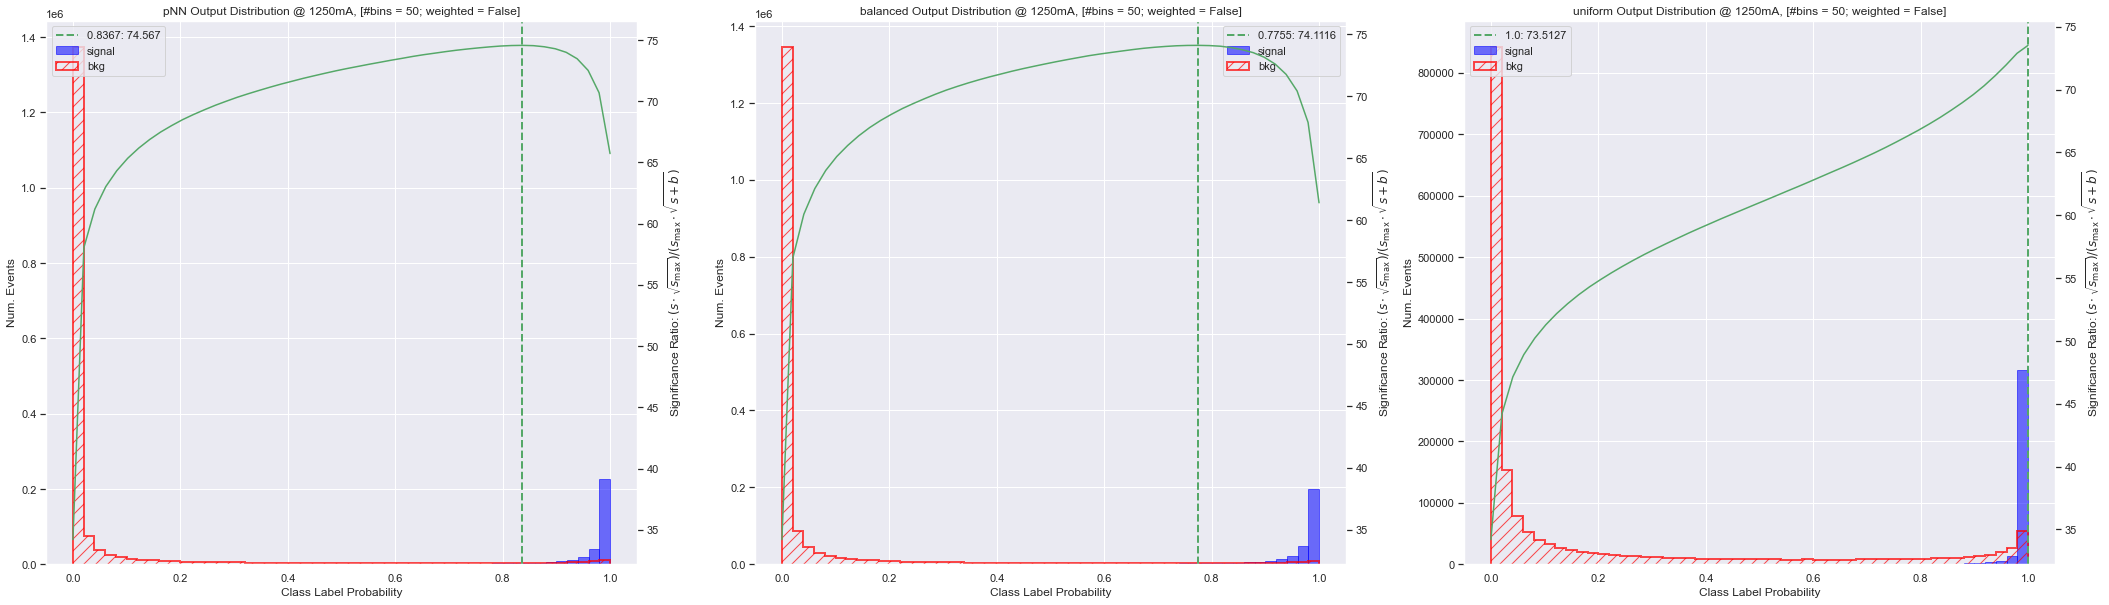

=== 1500 mA ===


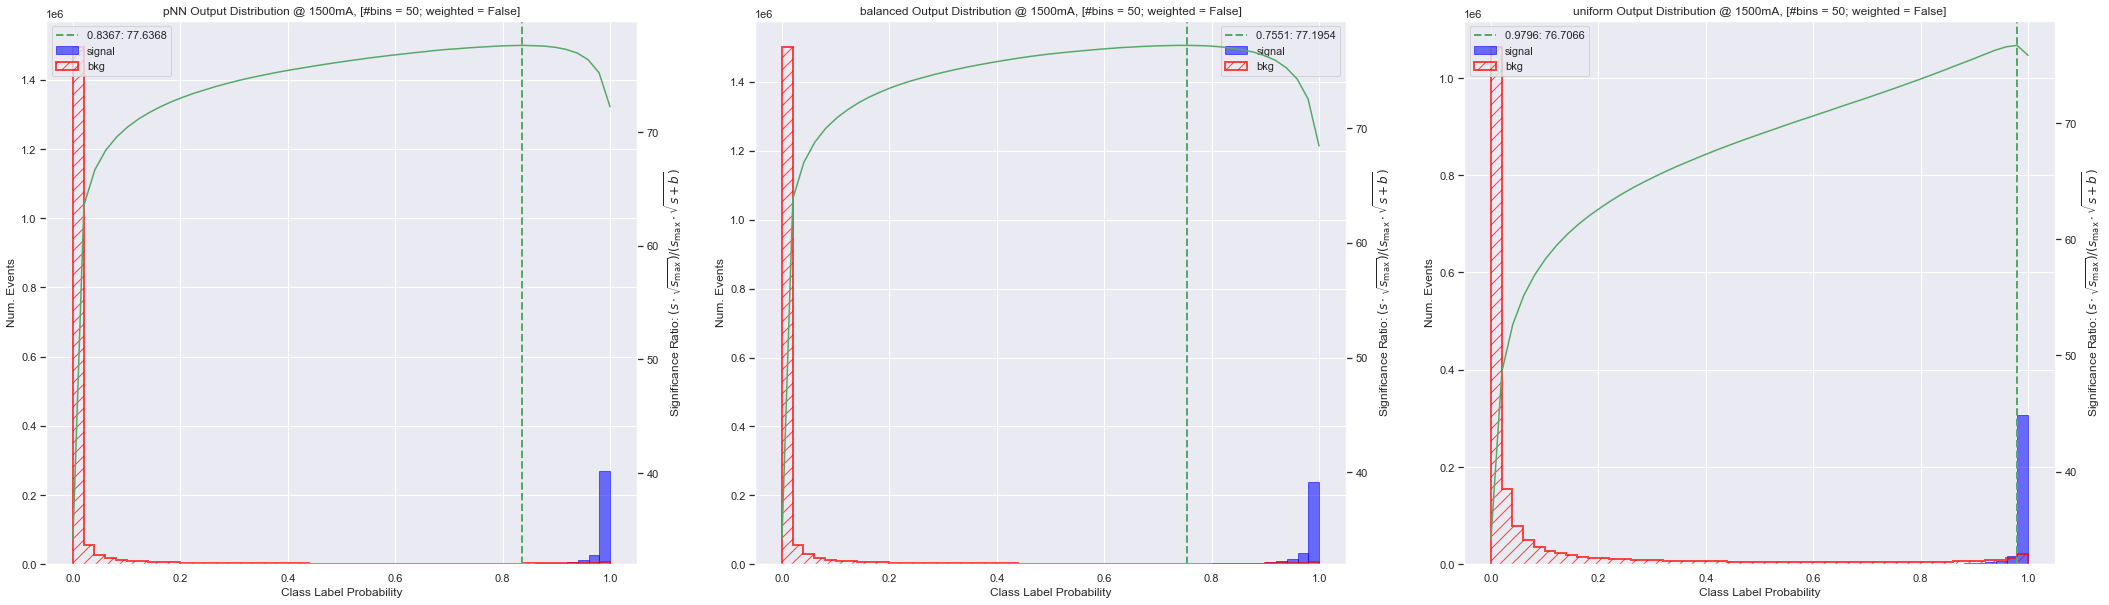

In [35]:
for mass in test.unique_signal_mass:
    print(f'=== {int(mass)} mA ===')
    axes = utils.get_plot_axes(rows=1, cols=3)
    
    for ax, (name, pnn) in zip(axes, models.items()):
        hep.significance(pnn, test, mass=mass, bins=50, ax=ax, name=name, show=False, 
                         ratio=True, weight=False)

    plt.show()
    free_mem()

ROC/PR Curves:

In [21]:
models_cuts = {}

for k, pnn in models.items():
    _, cuts = hep.plot.get_ams_and_cut(pnn, test, bins=100)
    models_cuts[k] = (pnn, cuts)

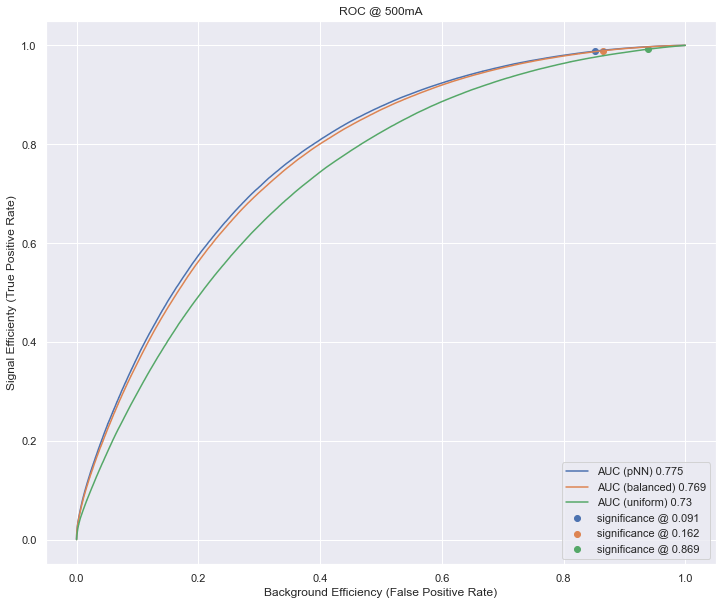

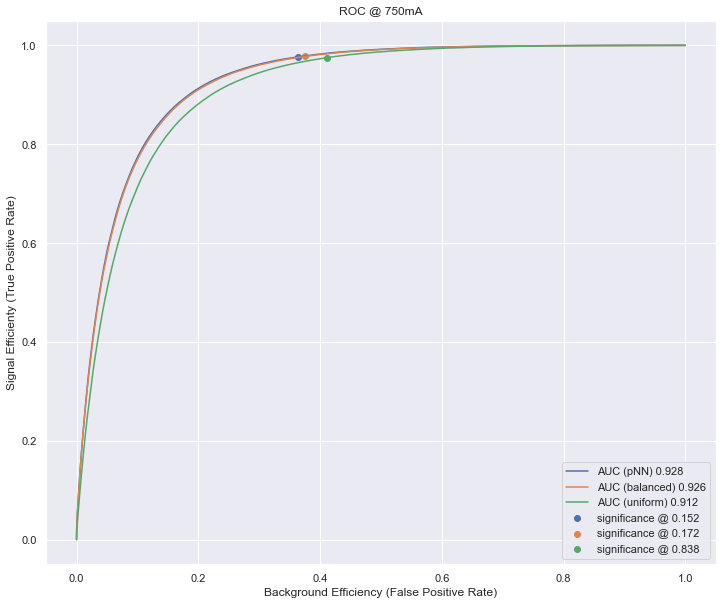

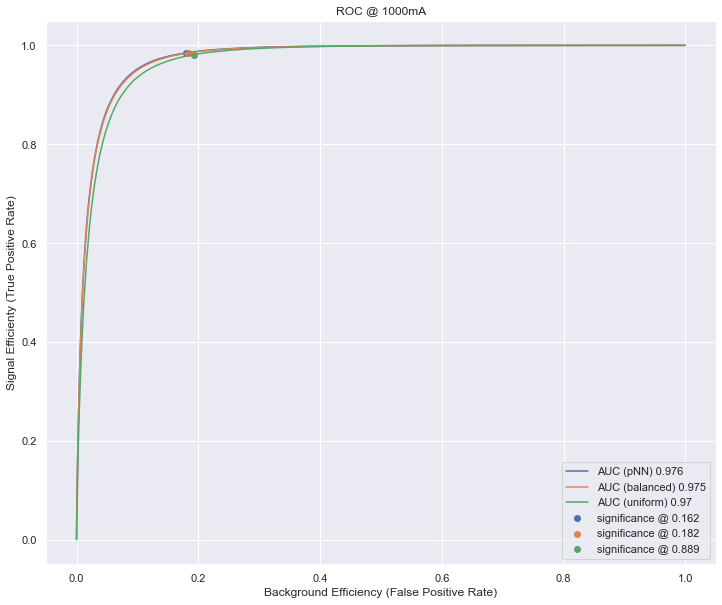

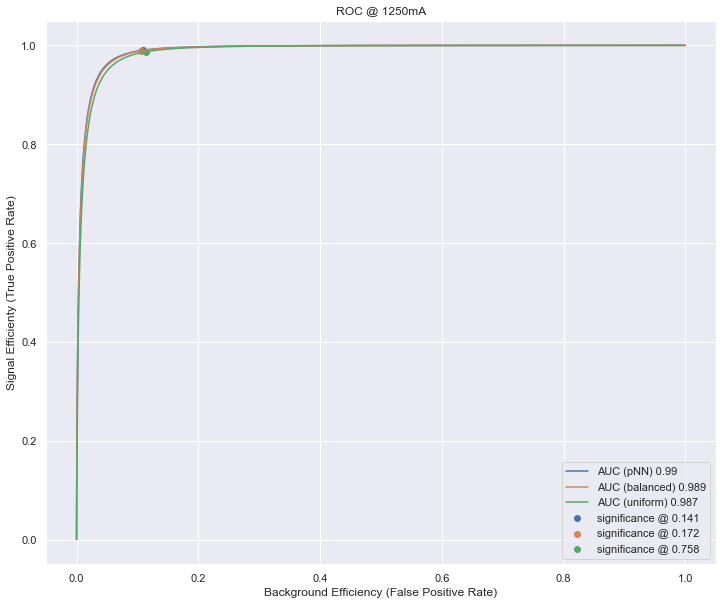

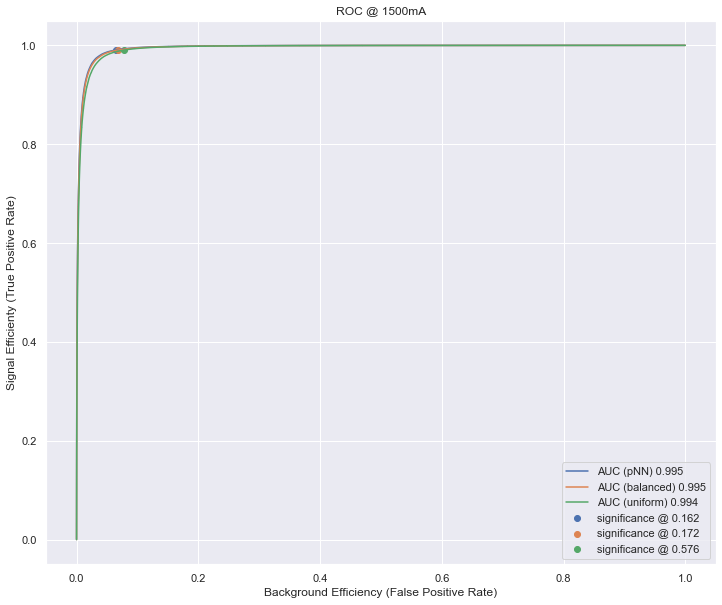

In [25]:
# ROC
for i, mass in enumerate(test.unique_signal_mass):
    hep.plot.compare_roc(test, {k: (pnn, cuts[i]) for k, (pnn, cuts) in models_cuts.items()}, 
                         mass=mass)
    free_mem()


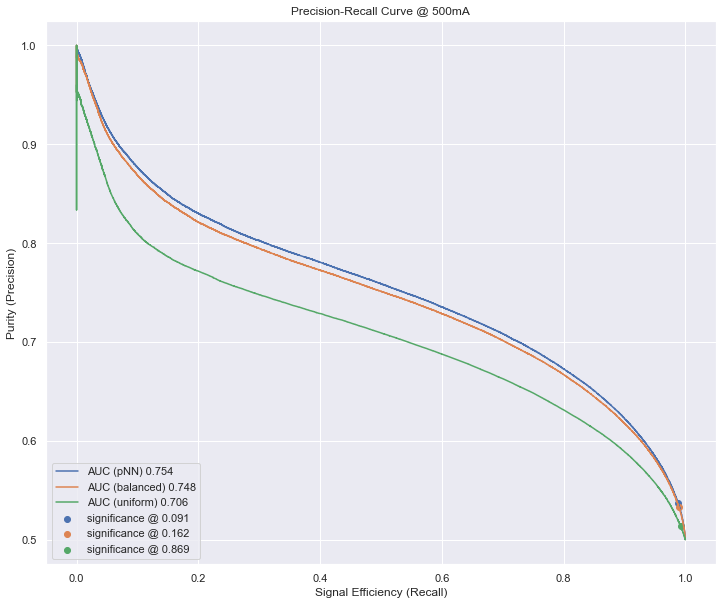

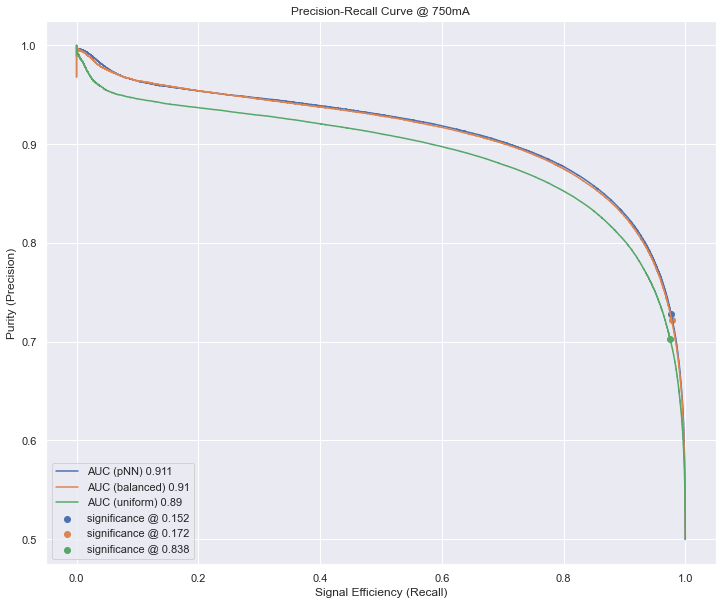

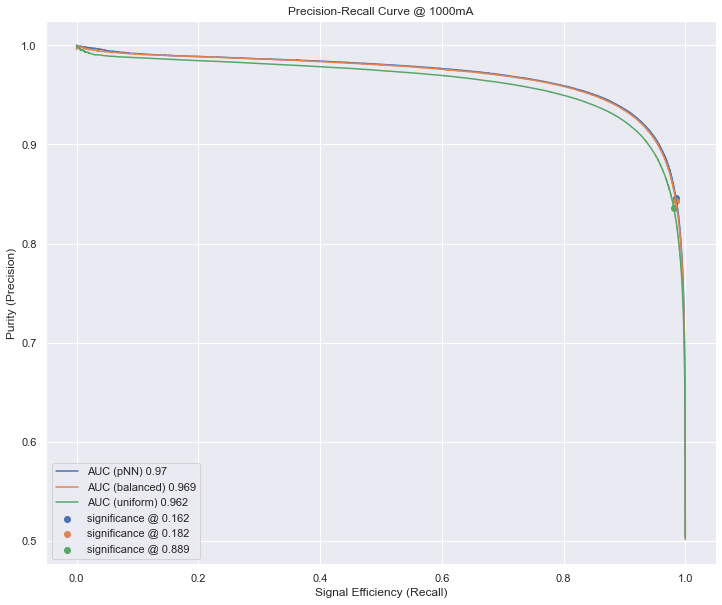

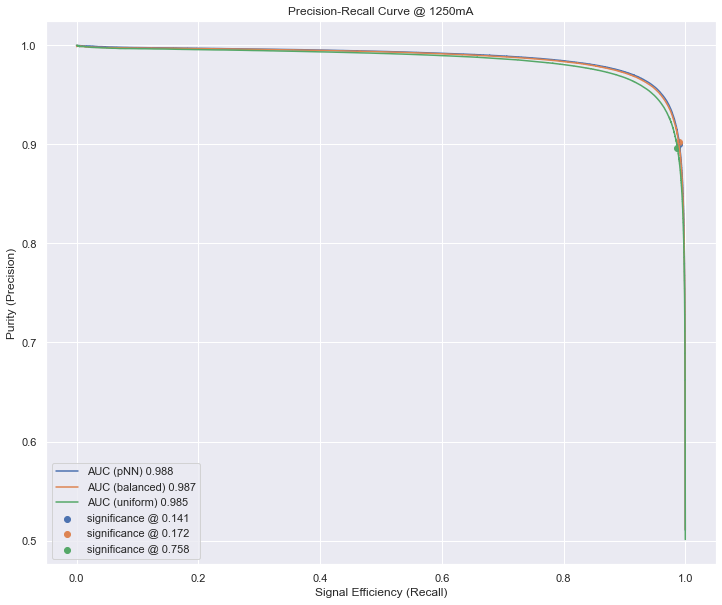

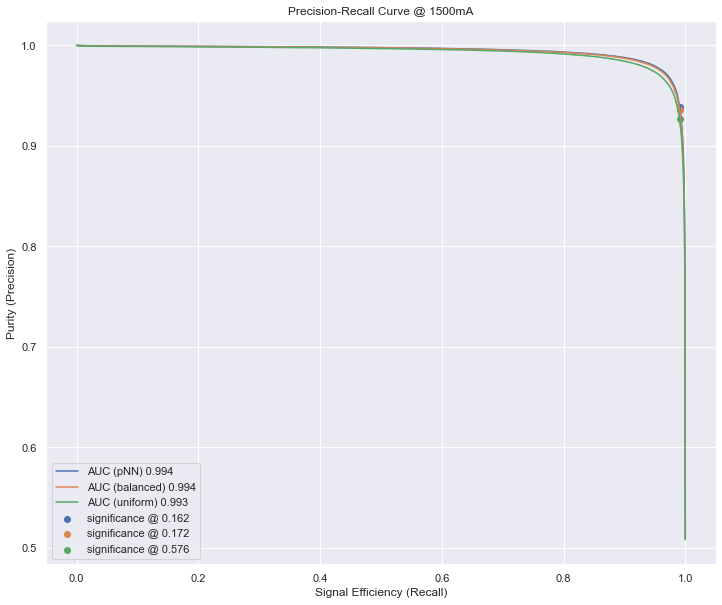

In [23]:
# PR
for i, mass in enumerate(test.unique_signal_mass):
    hep.plot.compare_pr(test, {k: (pnn, cuts[i]) for k, (pnn, cuts) in models_cuts.items()}, 
                        mass=mass)
    free_mem()
